In [1]:
# refugees-and-migrant-deaths-while-trying-to-reach-europe-1.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
# load refugees_deaths dataset
refugees_deaths = pd.read_csv('refugees-and-migrant-deaths-while-trying-to-reach-europe-1.csv')
refugees_deaths.head(5)

,Event_id,cause_of_death,CartoDB_Cause_of_death,dataset,date,quarter,Date-month,Year,dead,missing,...,description,location,latitude,longitude,"latitude, longitude",Somme Dedoublement,name,route (Frontex),source,source_url
0,NaN,shot by the police,authorities related death,NaN,2016-06-20T00:00:00Z,2Q2016,2016 -- 6,2016.0,8.0,0.0,...,8 Syrian refugees wre shot by the Turkush bord...,near Jisr al-Shugour,35.8150919,36.3123961,"35.8150919, 36.3123961",NaN,NaN,NaN,SOHR,http://edition.cnn.com/2016/06/20/middleeast/s...
1,NaN,drowned,drowning or exhaustion related death,NaN,2016-06-16T00:00:00Z,2Q2016,2016 -- 6,2016.0,1.0,0.0,...,"a body of a man, about 50, was found on a beac...",Lemos Vouliagmeni,37.8136546,23.8362307,"37.8136546, 23.8362307",NaN,NaN,Eastern Mediterranean route,Greek Coast Guard,http://www.hcg.gr/node/12832
2,NaN,drowned,drowning or exhaustion related death,NaN,2016-06-12T00:00:00Z,2Q2016,2016 -- 6,2016.0,1.0,0.0,...,a body of a man awas recovered in along with 1...,between Italy and Libya,33.5784085,11.9031222,"33.5784085, 11.9031222",NaN,NaN,Central Mediterranean route,DPA,http://www.dpa-international.com/news/internat...
3,NaN,stabbed,malicious intent related death / manslaughter,NaN,2016-06-02T00:00:00Z,2Q2016,2016 -- 6,2016.0,2.0,0.0,...,"2 men, a Turkish national and a suspected smug...",near Subotica,46.1174981,19.5601164,"46.1174981, 19.5601164",NaN,NaN,Western Balkan route,Telegraph,http://www.telegraph.co.uk/news/2016/06/13/hun...
4,NaN,unknown,unknown - supposedly exhaustion related death,NaN,2016-06-07T00:00:00Z,2Q2016,2016 -- 6,2016.0,0.0,1.0,...,a man was reported as missing off the coast of...,near Cadiz,36.5174058,-6.4323074,"36.5174058, -6.4323074",NaN,NaN,Western Mediterranean route,IOM,NaN


In [4]:
# show all columns
refugees_deaths.columns

Index(['Event_id', 'cause_of_death', 'CartoDB_Cause_of_death', 'dataset',
       'date', 'quarter', 'Date-month', 'Year', 'dead', 'missing',
       'dead_and_missing', 'Intent of going to Eur: 1(yes) 0(not confirmed)',
       'description', 'location', 'latitude', 'longitude',
       'latitude, longitude', 'Somme Dedoublement', 'name', 'route (Frontex)',
       'source', 'source_url'],
      dtype='object')

In [5]:
# clear not needed data
del refugees_deaths['Event_id']
del refugees_deaths['dataset']
del refugees_deaths['quarter']
del refugees_deaths['Date-month']
del refugees_deaths['Intent of going to Eur: 1(yes) 0(not confirmed)']
del refugees_deaths['latitude']
del refugees_deaths['longitude']
del refugees_deaths['latitude, longitude']
del refugees_deaths['Somme Dedoublement']
del refugees_deaths['name']
del refugees_deaths['source']

refugees_deaths.head(5)

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
0,shot by the police,authorities related death,2016-06-20T00:00:00Z,2016.0,8.0,0.0,8.0,8 Syrian refugees wre shot by the Turkush bord...,near Jisr al-Shugour,NaN,http://edition.cnn.com/2016/06/20/middleeast/s...
1,drowned,drowning or exhaustion related death,2016-06-16T00:00:00Z,2016.0,1.0,0.0,1.0,"a body of a man, about 50, was found on a beac...",Lemos Vouliagmeni,Eastern Mediterranean route,http://www.hcg.gr/node/12832
2,drowned,drowning or exhaustion related death,2016-06-12T00:00:00Z,2016.0,1.0,0.0,1.0,a body of a man awas recovered in along with 1...,between Italy and Libya,Central Mediterranean route,http://www.dpa-international.com/news/internat...
3,stabbed,malicious intent related death / manslaughter,2016-06-02T00:00:00Z,2016.0,2.0,0.0,2.0,"2 men, a Turkish national and a suspected smug...",near Subotica,Western Balkan route,http://www.telegraph.co.uk/news/2016/06/13/hun...
4,unknown,unknown - supposedly exhaustion related death,2016-06-07T00:00:00Z,2016.0,0.0,1.0,1.0,a man was reported as missing off the coast of...,near Cadiz,Western Mediterranean route,NaN


In [6]:
# count unique values of CartoDB_Cause_of_death
refugees_deaths['CartoDB_Cause_of_death'].value_counts()

drowning or exhaustion related death                           1679
unknown - supposedly exhaustion related death                   759
violent accidental death (transport, blown in minefield...)     272
suicide                                                         230
authorities related death                                       140
malicious intent related death / manslaughter                    93
other                                                            20
Name: CartoDB_Cause_of_death, dtype: int64

In [7]:
# sum all people who went missing or died by general cause of death (CartoDB_Cause_of_death)
grouped_all = refugees_deaths.groupby('CartoDB_Cause_of_death')['dead_and_missing'].sum()
print(grouped_all)

CartoDB_Cause_of_death
authorities related death                                        402.0
drowning or exhaustion related death                           25560.0
malicious intent related death / manslaughter                    345.0
other                                                             24.0
suicide                                                          245.0
unknown - supposedly exhaustion related death                   7454.0
violent accidental death (transport, blown in minefield...)      831.0
Name: dead_and_missing, dtype: float64


In [8]:
# count unique values of cause_of_death, show how many unique values are in the dataset
list_deaths = list(refugees_deaths.cause_of_death.unique())
print(len(list_deaths))

74


In [9]:
# print the unique values of cause_of_death
print(list_deaths)

['shot by the police', 'drowned', 'stabbed', 'unknown', 'exposure', 'died in a sewer', 'murdered', 'burns or suffocation', 'hit by a truck', 'hit by a car', 'illness', 'bombed', 'killed', 'shot', 'suicide', 'ran over by a truck', 'fell off a train', 'shot by border police', 'wounded', 'disappeared', 'starved', 'hypothermia', 'suffocation', 'car accident', 'tortured', 'asphyxiated', 'electrocuted', 'burned', 'hit by a train', 'natural causes', 'police violence', 'crushed by a wooden pallet in a truck', 'intoxicated', 'run over by a car', 'run over by a train', 'fall', 'heart failure', 'lack of medical care', 'run over by a truck', 'exhaustion', 'died from dehydration', 'run over by a bus', 'drowned or thirst', 'crushed', 'suffocated or drowned', 'run over', 'exhaustion or thirst', 'hypothermia and dehydration', 'died presumably  from ill treatments', 'died in childbirth', 'suicide - jumped in water', 'suicide - other', 'frozen', 'suicide - hanged', 'suicide - put on fire', 'burned or as

In [10]:
# separate drowned (from CartoDB_Cause_of_death) in a separate dataframe
drowned = refugees_deaths[refugees_deaths['CartoDB_Cause_of_death'] == 'drowning or exhaustion related death']
drowned.head()

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
1,drowned,drowning or exhaustion related death,2016-06-16T00:00:00Z,2016.0,1.0,0.0,1.0,"a body of a man, about 50, was found on a beac...",Lemos Vouliagmeni,Eastern Mediterranean route,http://www.hcg.gr/node/12832
2,drowned,drowning or exhaustion related death,2016-06-12T00:00:00Z,2016.0,1.0,0.0,1.0,a body of a man awas recovered in along with 1...,between Italy and Libya,Central Mediterranean route,http://www.dpa-international.com/news/internat...
8,drowned,drowning or exhaustion related death,2016-06-03T00:00:00Z,2016.0,10.0,329.0,339.0,"318 people were saved, 10 were found dead, and...",75 nautical miles off Crete,Central Mediterranean route,http://in.reuters.com/article/europe-migrants-...
9,drowned,drowning or exhaustion related death,2016-06-02T00:00:00Z,2016.0,133.0,0.0,133.0,133 dead people have been found on the sea sho...,near Zuwara,Central Mediterranean route,http://www.reuters.com/article/us-europe-migra...
11,drowned,drowning or exhaustion related death,2016-06-01T00:00:00Z,2016.0,2.0,0.0,2.0,2 boys from Iraq were found dead in an irrigat...,near Katherini,Eastern Mediterranean route,http://abcnews.go.com/International/wireStory/...


In [11]:
# group the drowned category by cause_of_death, sum the values
grouped_drowned = drowned.groupby('cause_of_death')['dead_and_missing'].sum()
print(grouped_drowned)

cause_of_death
asphyxiated                           536.0
died from dehydration                 373.0
died in childbirth                      3.0
died of a shock                         2.0
died of kidney failure                  2.0
died of suddent infant death            2.0
drowned                             22693.0
drowned or thirst                      21.0
exhaustion                            183.0
exhaustion or thirst                   46.0
frozen                                 45.0
heart failure                          16.0
heat exhaustion                        10.0
hypothermia                           239.0
hypothermia and dehydration            26.0
illness                                 4.0
lack of medical care                   68.0
starved                              1235.0
starved or died from dehydration       11.0
suffocated or drowned                  45.0
Name: dead_and_missing, dtype: float64


In [12]:
# separate unknown (from CartoDB_Cause_of_death) in a separate dataframe
unknown = refugees_deaths[refugees_deaths['CartoDB_Cause_of_death'] == 'unknown - supposedly exhaustion related death']
unknown.head()

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
4,unknown,unknown - supposedly exhaustion related death,2016-06-07T00:00:00Z,2016.0,0.0,1.0,1.0,a man was reported as missing off the coast of...,near Cadiz,Western Mediterranean route,NaN
12,unknown,unknown - supposedly exhaustion related death,2016-05-29T00:00:00Z,2016.0,1.0,0.0,1.0,a decayed body of a 68-year old man was found...,Perveza,Eastern Mediterranean route,http://www.hcg.gr/node/12607
13,unknown,unknown - supposedly exhaustion related death,2016-05-30T00:00:00Z,2016.0,1.0,0.0,1.0,a body of a man was found in a boat with 123 r...,28 nautical miles North-west of Tripoli,Central Mediterranean route,http://www.irishexaminer.com/ireland/migrants-...
26,unknown,unknown - supposedly exhaustion related death,2016-05-16T00:00:00Z,2016.0,2.0,0.0,2.0,"2 young men were found dead in the Nile Delta,...","Kafr-el-Scheikh governorate, sea shore",NaN,http://english.ahram.org.eg/NewsContent/1/64/2...
32,unknown,unknown - supposedly exhaustion related death,2016-04-30T00:00:00Z,2016.0,1.0,0.0,1.0,"a body of a woman, badly decayed, was found on...",Samos,Eastern Mediterranean route,http://www.hcg.gr/node/12503


In [13]:
# group the unknown category by cause_of_death, sum the values
grouped_unknown = unknown.groupby('cause_of_death')['dead_and_missing'].sum()
print(grouped_unknown)

cause_of_death
drowned       1.0
unknown    7453.0
Name: dead_and_missing, dtype: float64


In [14]:
# separate violent accidental death (from CartoDB_Cause_of_death) in a separate dataframe
violent = refugees_deaths[refugees_deaths['CartoDB_Cause_of_death'] == 'violent accidental death (transport, blown in minefield...)']
violent.head()

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
17,hit by a truck,"violent accidental death (transport, blown in ...",2016-05-28T00:00:00Z,2016.0,1.0,0.0,1.0,a 25-year old Afghan man was run over by a tru...,Calais,NaN,http://www.nordlittoral.fr/faits-divers/calais...
18,hit by a car,"violent accidental death (transport, blown in ...",2016-05-25T00:00:00Z,2016.0,1.0,0.0,1.0,an Eritrean woman was killed in Libya. Her dau...,Libya,NaN,http://www.cbc.ca/news/world/migrant-drownings...
20,drowned,"violent accidental death (transport, blown in ...",2016-05-26T00:00:00Z,2016.0,4.0,0.0,4.0,"the Libyan coast guard has recovered 4 bodies,...",off the coast of Libya,Central Mediterranean route,http://news.nationalpost.com/news/world/bodies...
28,bombed,"violent accidental death (transport, blown in ...",2016-05-09T00:00:00Z,2016.0,4.0,0.0,4.0,4 children died in a Kilis orphanage due to bo...,Kilis,NaN,http://www.thedailybeast.com/articles/2016/05/...
29,hit by a car,"violent accidental death (transport, blown in ...",2016-05-09T00:00:00Z,2016.0,1.0,0.0,1.0,a 24-year old man from Pakistan was hit by a c...,Calais,NaN,http://www.nordlittoral.fr/faits-divers/un-ref...


In [15]:
# group the violent death category by cause_of_death, sum the values
grouped_violent = violent.groupby('cause_of_death')['dead_and_missing'].sum()
print(grouped_violent)

cause_of_death
blown in minefield                        76.0
bombed                                     9.0
burned                                    85.0
car accident                             437.0
crushed                                   38.0
crushed by a wooden pallet in a truck      1.0
drowned                                    4.0
electrocuted                               3.0
fall                                      40.0
fell off a train                           1.0
frozen                                    25.0
hit by a car                               7.0
hit by a train                             4.0
hit by a truck                             1.0
intoxicated                                1.0
ran over by a truck                        3.0
run over                                   3.0
run over by a bus                          5.0
run over by a car                          8.0
run over by a train                       22.0
run over by a truck                       13.

In [16]:
# separate suicide (from CartoDB_Cause_of_death) in a separate dataframe
suicide = refugees_deaths[refugees_deaths['CartoDB_Cause_of_death'] == 'suicide']
suicide.head()

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
49,suicide,suicide,2016-03-25T00:00:00Z,2016.0,1.0,0.0,1.0,A gay Russian opposition activist who lived in...,Luxembourg,NaN,http://www.lequotidien.lu/politique-et-societe...
123,suicide,suicide,2016-01-16T00:00:00Z,2016.0,1.0,0.0,1.0,An Iraqi man killed himself in a refugee selte...,Alphen aan den Rijn,NaN,http://www.nytimes.com/aponline/2016/01/18/wor...
313,suicide,suicide,2015-05-05T00:00:00Z,2015.0,1.0,0.0,1.0,a young Kurdish man convicted of smuggling hun...,Longuenesse,NaN,http://www.20minutes.fr/lille/1602395-20150506...
334,suicide,suicide,2015-02-13T00:00:00Z,2015.0,1.0,0.0,1.0,untreated diabetes,Thessaloniki police station,NaN,NaN
456,suicide,suicide,2013-06-19T00:00:00Z,2013.0,1.0,0.0,1.0,A man from Benin committed suicide out of fear...,Nerder-over-Heembeek,NaN,NaN


In [17]:
# group the suicide death category by cause_of_death, sum the values
grouped_suicide = suicide.groupby('cause_of_death')['dead_and_missing'].sum()
print(grouped_suicide)

cause_of_death
suicide                           14.0
suicide - hanged                  95.0
suicide - hungerstrike             3.0
suicide - jumped from building    16.0
suicide - jumped from train        1.0
suicide - jumped in water         21.0
suicide - other                   64.0
suicide - put on fire             23.0
suicide - under train              8.0
Name: dead_and_missing, dtype: float64


In [18]:
# separate authorities related death (from CartoDB_Cause_of_death) in a separate dataframe
authorities = refugees_deaths[refugees_deaths['CartoDB_Cause_of_death'] == 'authorities related death']
authorities.head()

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
0,shot by the police,authorities related death,2016-06-20T00:00:00Z,2016.0,8.0,0.0,8.0,8 Syrian refugees wre shot by the Turkush bord...,near Jisr al-Shugour,NaN,http://edition.cnn.com/2016/06/20/middleeast/s...
7,drowned,authorities related death,2016-06-01T00:00:00Z,2016.0,1.0,0.0,1.0,A 22-year old man from Syria drowned in the ri...,Tisza river near the village of Roszke,Western Balkan route,http://www.dw.com/en/unhcr-calls-for-investiga...
25,illness,authorities related death,2016-05-19T00:00:00Z,2016.0,1.0,0.0,1.0,a 44-year old Syrian man died in hospital in C...,Chios,Eastern Mediterranean route,https://archive.is/GuXGI
37,hit by a car,authorities related death,2016-04-21T00:00:00Z,2016.0,1.0,0.0,1.0,a 40-year old man from Syria (possibly Kurdish...,Idomeni,Western Balkan route,http://www.independent.co.uk/news/world/europe...
40,shot,authorities related death,2016-04-20T00:00:00Z,2016.0,8.0,0.0,8.0,8 Syrian refugees- women and children among th...,Turkish-Syrian border,NaN,https://www.almasdarnews.com/article/syrian-wo...


In [19]:
# group the authorities related death category by cause_of_death, sum the values
grouped_authorities = authorities.groupby('cause_of_death')['dead_and_missing'].sum()
print(grouped_authorities)

cause_of_death
asphyxiated                3.0
drowned                    1.0
fall                       1.0
hit by a car               1.0
illness                    1.0
police violence          100.0
shot                      28.0
shot by border police     10.0
shot by the police       257.0
Name: dead_and_missing, dtype: float64


In [20]:
# separate manslaughter (from CartoDB_Cause_of_death) in a separate dataframe
manslaughter = refugees_deaths[refugees_deaths['CartoDB_Cause_of_death'] == 'malicious intent related death / manslaughter']
manslaughter.head()

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
3,stabbed,malicious intent related death / manslaughter,2016-06-02T00:00:00Z,2016.0,2.0,0.0,2.0,"2 men, a Turkish national and a suspected smug...",near Subotica,Western Balkan route,http://www.telegraph.co.uk/news/2016/06/13/hun...
10,murdered,malicious intent related death / manslaughter,2016-05-30T00:00:00Z,2016.0,1.0,0.0,1.0,"a 16-year old girl, Afghan asylum seeker, was ...",Hökarängen forest,NaN,http://www.thelocal.se/20160602/reports-dead-g...
30,killed,malicious intent related death / manslaughter,2016-05-05T00:00:00Z,2016.0,28.0,0.0,28.0,28 refgees died in an airtsrike targeted at th...,"Kamouna camp near Sarmada, Syria",NaN,http://www.bbc.co.uk/news/world-middle-east-36...
36,killed,malicious intent related death / manslaughter,2016-04-26T00:00:00Z,2016.0,13.0,0.0,13.0,3 Libyan smugglers and 13 Egyptians were kille...,Bani Walid,NaN,http://unsmil.unmissions.org/Default.aspx?tabi...
89,murdered,malicious intent related death / manslaughter,2016-02-14T00:00:00Z,2016.0,1.0,0.0,1.0,1 man was killed in a fight in a refugee centr...,Ljusne,NaN,http://news.yahoo.com/sweden-opens-murder-prob...


In [21]:
# group the manslaughter category by cause_of_death, sum the values
grouped_manslaughter = manslaughter.groupby('cause_of_death')['dead_and_missing'].sum()
print(grouped_manslaughter)

cause_of_death
burned or asphyxiated due to arson attack     14.0
died after a fight                             6.0
died because of dangerous undeclared work      1.0
died presumably  from ill treatments          13.0
executed                                      20.0
killed                                        41.0
lack of medical care                           1.0
murdered                                     213.0
shot                                          24.0
stabbed                                        8.0
tortured                                       2.0
wrong medical treatment, overdose              2.0
Name: dead_and_missing, dtype: float64


In [22]:
# separate other (from CartoDB_Cause_of_death) in a separate dataframe
other = refugees_deaths[refugees_deaths['CartoDB_Cause_of_death'] == 'other']
other.head()

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
5,exposure,other,2016-06-07T00:00:00Z,2016.0,1.0,0.0,1.0,a body of man was found dead in the slowaway ...,Brussels,NaN,http://bx1.be/news/un-corps-sans-vie-decouvert...
6,died in a sewer,other,2016-06-09T00:00:00Z,2016.0,1.0,0.0,1.0,a young man frrom Sub-Saharan Africa died afte...,Melilla,Central Mediterranean route,http://www.huffpostmaghreb.com/2016/06/08/migr...
16,burns or suffocation,other,2016-05-25T00:00:00Z,2016.0,4.0,0.0,4.0,UNHCR reported the finding of 4 bodies in the ...,off the coast of Lampedusa,Central Mediterranean route,NaN
62,illness,other,2016-03-21T00:00:00Z,2016.0,1.0,0.0,1.0,a 15-year old boy from Somalia died of lung in...,Cagliali,Central Mediterranean route,9.0264574
83,unknown,other,2016-03-02T00:00:00Z,2016.0,1.0,0.0,1.0,IOM reported a death of a child in Mytilene h...,Lesvos,Eastern Mediterranean route,NaN


In [23]:
# group the other category by cause_of_death, sum the values
grouped_other = other.groupby('cause_of_death')['dead_and_missing'].sum()
print(grouped_other)

cause_of_death
attacked by animals                 1.0
bled to death due to barbed wire    2.0
burns or suffocation                4.0
died in a sewer                     1.0
disappeared                         1.0
electrocuted                        4.0
exposure                            5.0
illness                             1.0
killed by bomb                      1.0
natural causes                      1.0
starved                             1.0
suffocation                         1.0
unknown                             1.0
Name: dead_and_missing, dtype: float64


In [24]:
# check for NaN values
null_columns = refugees_deaths.columns[refugees_deaths.isnull().any()]
refugees_deaths[null_columns].isnull().sum()

cause_of_death              13
CartoDB_Cause_of_death      13
date                        15
Year                        15
dead                        13
missing                     13
dead_and_missing            13
description                 20
location                    27
route (Frontex)            986
source_url                1563
dtype: int64

In [25]:
# remove rows with NaN in columns 'cause_of_death', 'CartoDB_Cause_of_death', 'dead_and_missing', 'Year'
refugees_deaths = refugees_deaths.dropna(subset=['cause_of_death', 'CartoDB_Cause_of_death',
                                                'dead_and_missing', 'Year'])
refugees_deaths.head(5)

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
0,shot by the police,authorities related death,2016-06-20T00:00:00Z,2016.0,8.0,0.0,8.0,8 Syrian refugees wre shot by the Turkush bord...,near Jisr al-Shugour,NaN,http://edition.cnn.com/2016/06/20/middleeast/s...
1,drowned,drowning or exhaustion related death,2016-06-16T00:00:00Z,2016.0,1.0,0.0,1.0,"a body of a man, about 50, was found on a beac...",Lemos Vouliagmeni,Eastern Mediterranean route,http://www.hcg.gr/node/12832
2,drowned,drowning or exhaustion related death,2016-06-12T00:00:00Z,2016.0,1.0,0.0,1.0,a body of a man awas recovered in along with 1...,between Italy and Libya,Central Mediterranean route,http://www.dpa-international.com/news/internat...
3,stabbed,malicious intent related death / manslaughter,2016-06-02T00:00:00Z,2016.0,2.0,0.0,2.0,"2 men, a Turkish national and a suspected smug...",near Subotica,Western Balkan route,http://www.telegraph.co.uk/news/2016/06/13/hun...
4,unknown,unknown - supposedly exhaustion related death,2016-06-07T00:00:00Z,2016.0,0.0,1.0,1.0,a man was reported as missing off the coast of...,near Cadiz,Western Mediterranean route,NaN


In [26]:
refugees_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3191 entries, 0 to 3190
Data columns (total 11 columns):
cause_of_death            3191 non-null object
CartoDB_Cause_of_death    3191 non-null object
date                      3191 non-null object
Year                      3191 non-null float64
dead                      3191 non-null float64
missing                   3191 non-null float64
dead_and_missing          3191 non-null float64
description               3184 non-null object
location                  3178 non-null object
route (Frontex)           2219 non-null object
source_url                1642 non-null object
dtypes: float64(4), object(7)
memory usage: 299.2+ KB


In [27]:
# convert Year type to int
refugees_deaths['Year'] = refugees_deaths['Year'].astype('int32')
refugees_deaths['dead_and_missing'] = refugees_deaths['dead_and_missing'].astype('int32')

In [28]:
refugees_deaths.dtypes

cause_of_death             object
CartoDB_Cause_of_death     object
date                       object
Year                        int32
dead                      float64
missing                   float64
dead_and_missing            int32
description                object
location                   object
route (Frontex)            object
source_url                 object
dtype: object

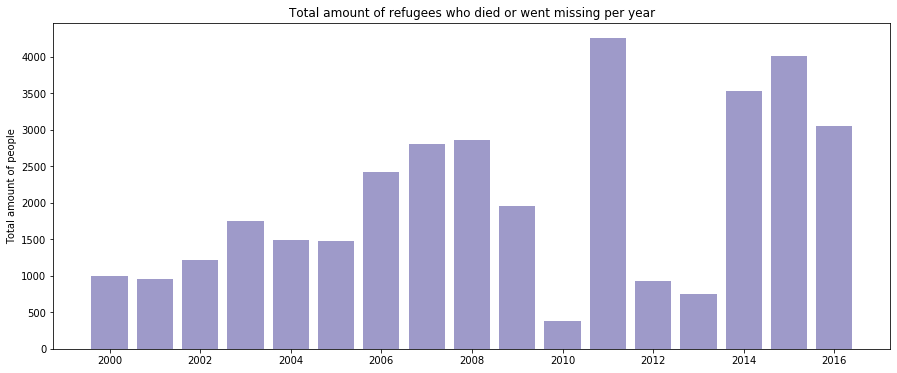

In [29]:
# bar chart showing total deaths/missing by year
dead_and_missing_per_year = refugees_deaths.groupby(['Year']).sum()[['dead_and_missing']].reset_index()

plt.rcParams['figure.figsize'] = [15, 6]
plt.locator_params(axis='x', nbins=15)

plt.bar( dead_and_missing_per_year['Year'], dead_and_missing_per_year['dead_and_missing'], 
        align='center', color='#7570b3', alpha=0.7)

plt.ylabel('Total amount of people')
plt.title('Total amount of refugees who died or went missing per year')

plt.savefig('ref_death_per_year.png')

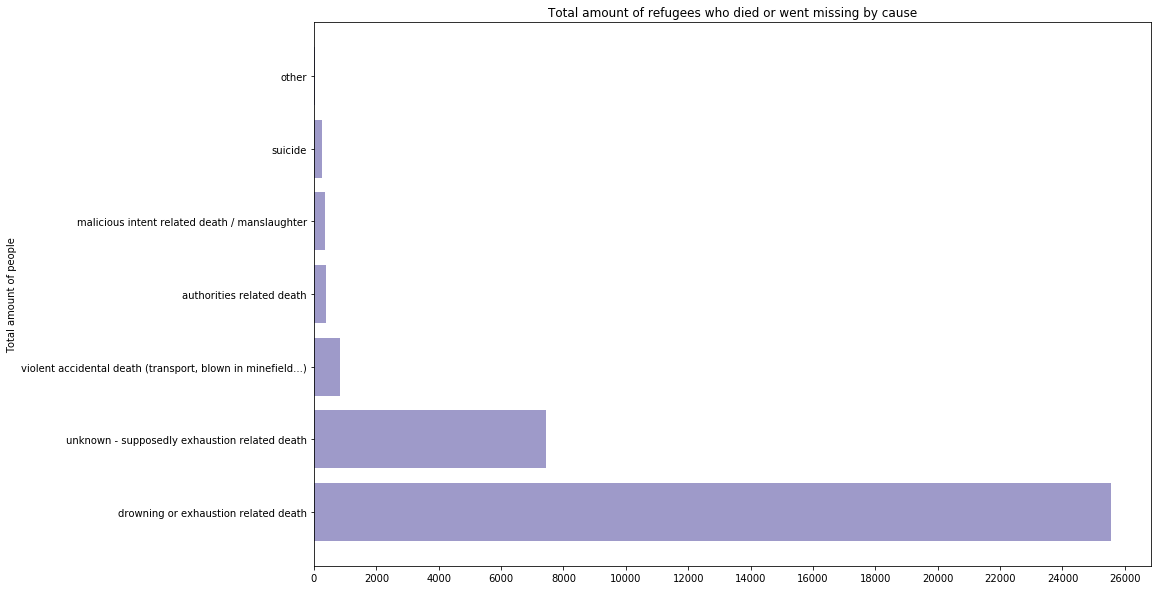

In [30]:
# bar chart showing total deaths/missing by year depending on the general cause of death
dead_and_missing_by_cause = refugees_deaths.groupby(['CartoDB_Cause_of_death']).sum()[['dead_and_missing']].reset_index()
dead_and_missing_by_cause.sort_values(by=['dead_and_missing'], ascending=False, inplace=True)

plt.rcParams['figure.figsize'] = [15, 10]
plt.locator_params(axis='x', nbins=15)

plt.barh( dead_and_missing_by_cause['CartoDB_Cause_of_death'], dead_and_missing_by_cause['dead_and_missing'], 
        align='center', color='#7570b3', alpha=0.7)

plt.ylabel('Total amount of people')
plt.title('Total amount of refugees who died or went missing by cause')

plt.savefig('ref_death_by_cause.png')

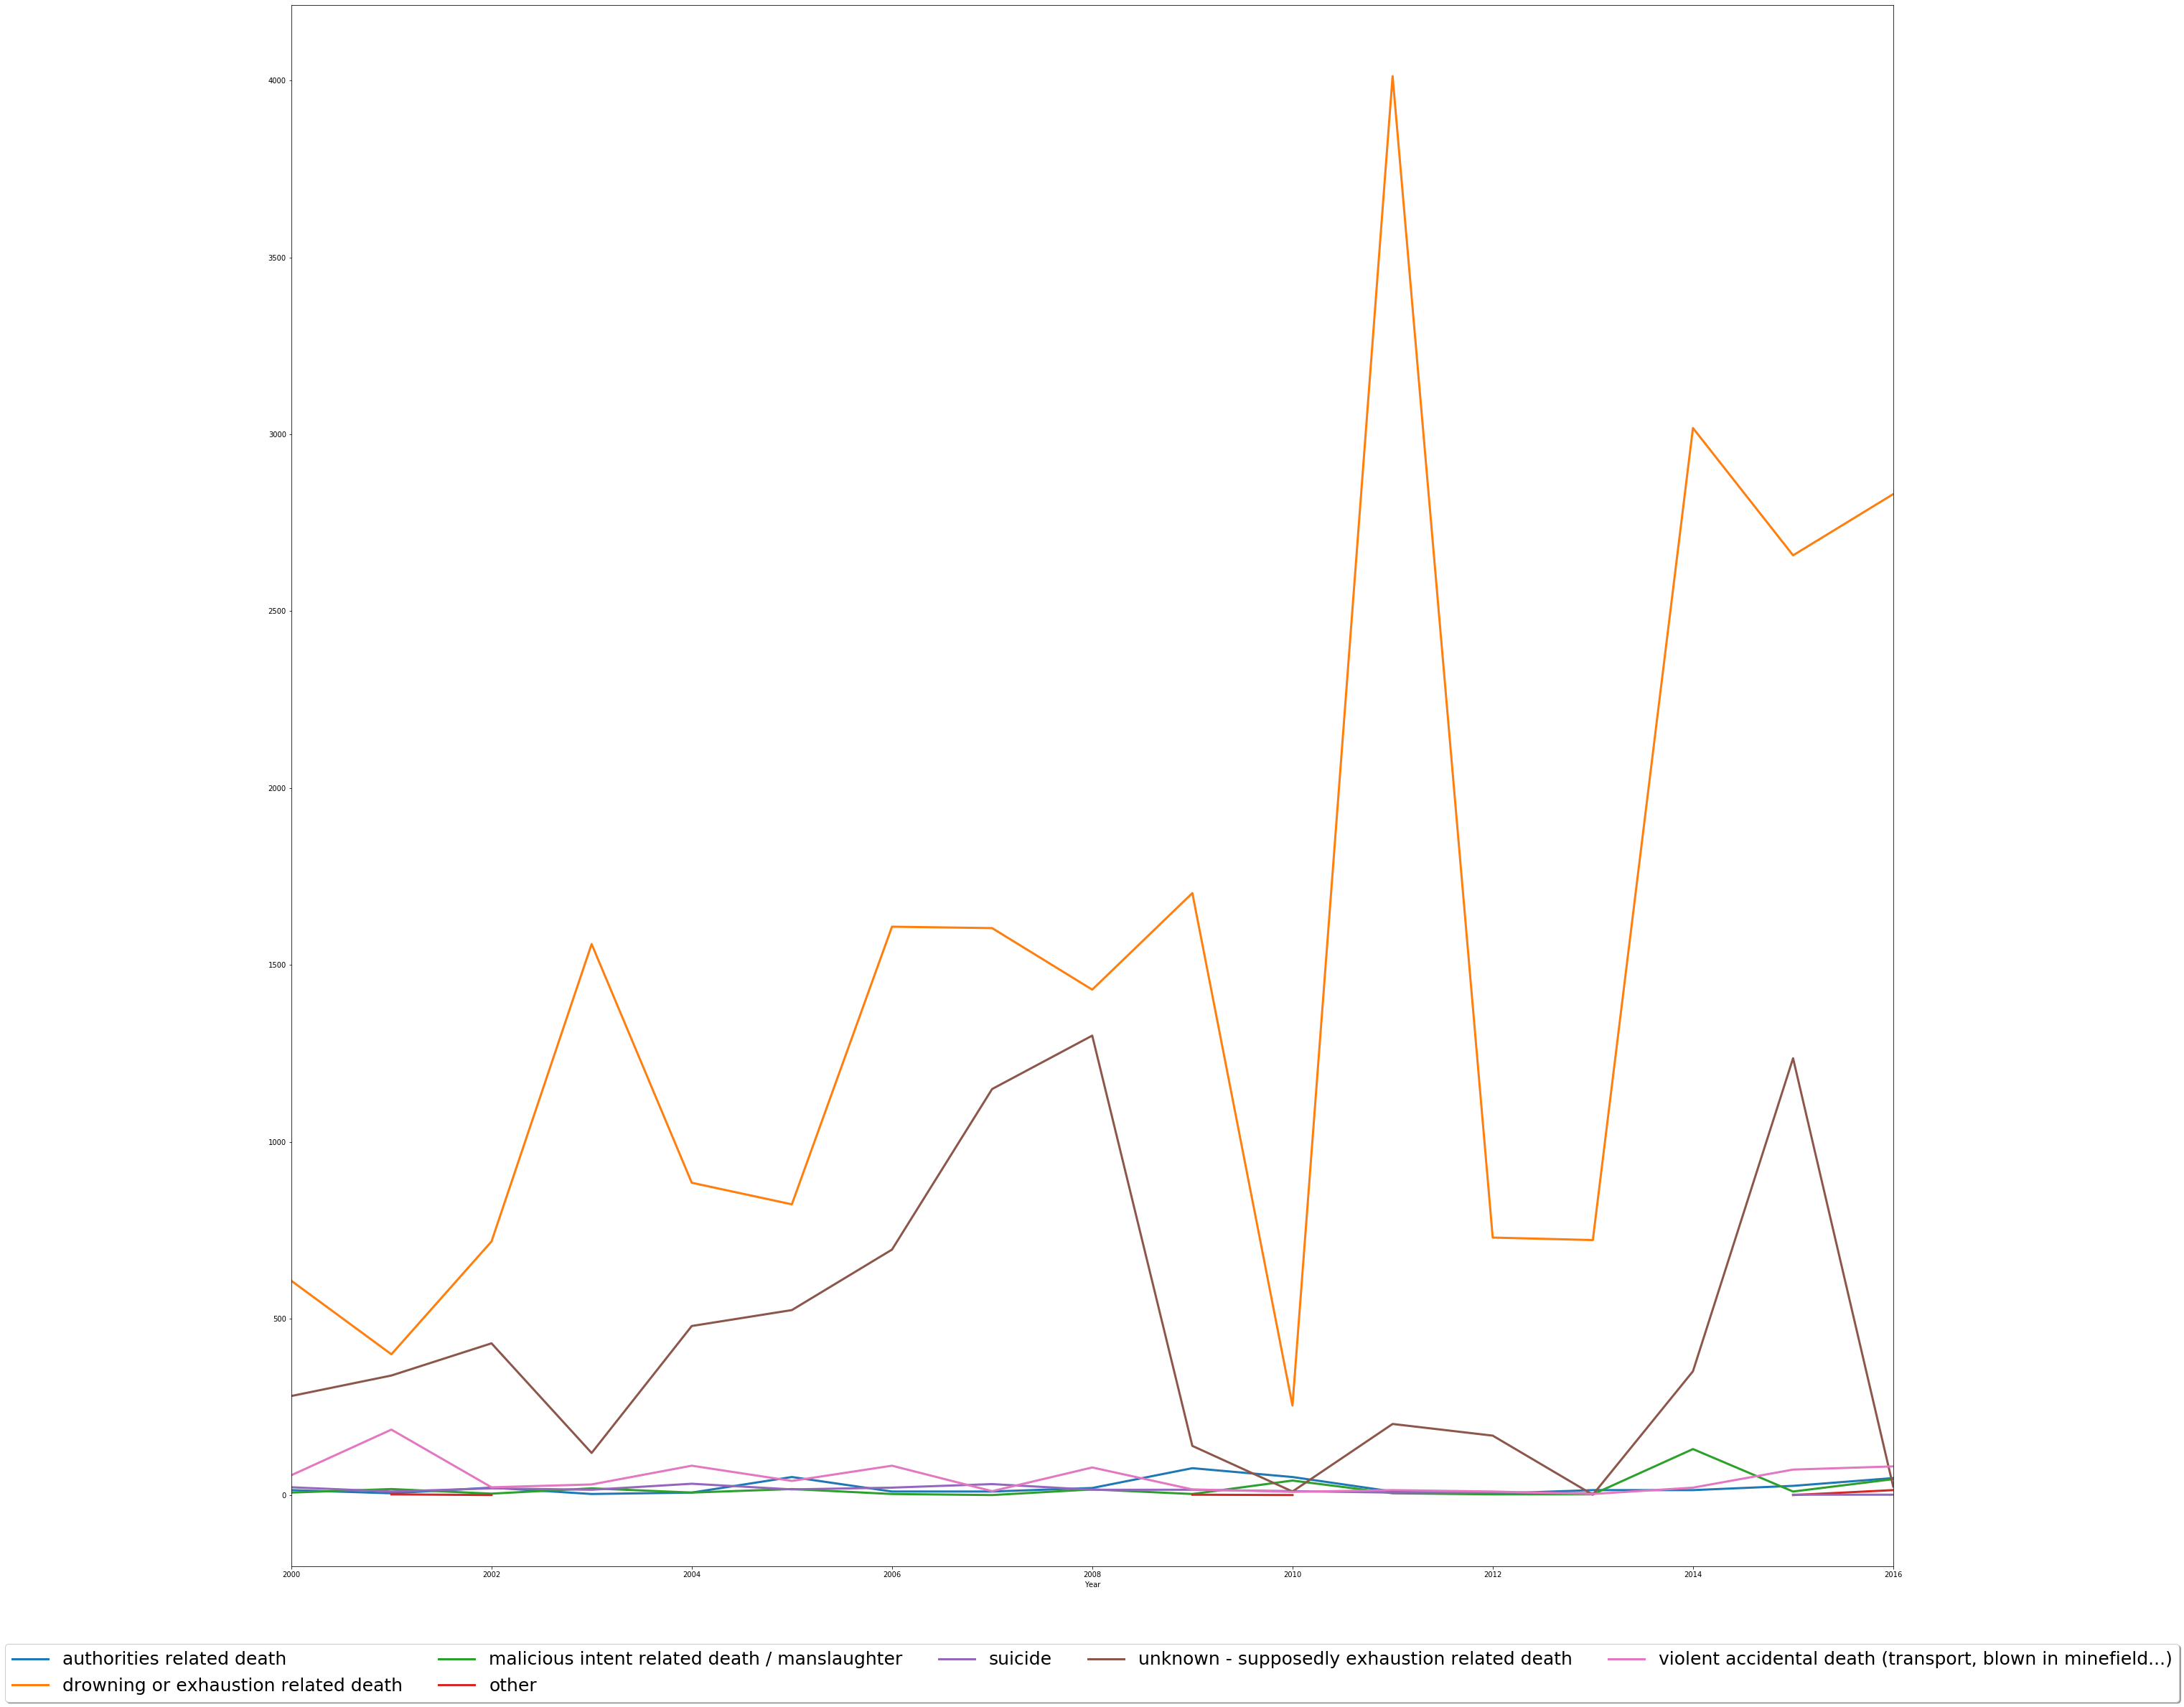

In [31]:
# plot line chart showing all refugees who died or went missing by year, different lines
# showing the cause of death
fig, ax = plt.subplots(figsize=(40,40))
refugees_deaths.groupby(['Year','CartoDB_Cause_of_death']).sum()['dead_and_missing'].unstack().plot(ax=ax, linewidth=3)
# place legend below the chart
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, 
           shadow=True, ncol=5, borderaxespad=0., prop={'size': 25})

Text(0.5, 1.0, 'Refugees deaths per year and cause of death')

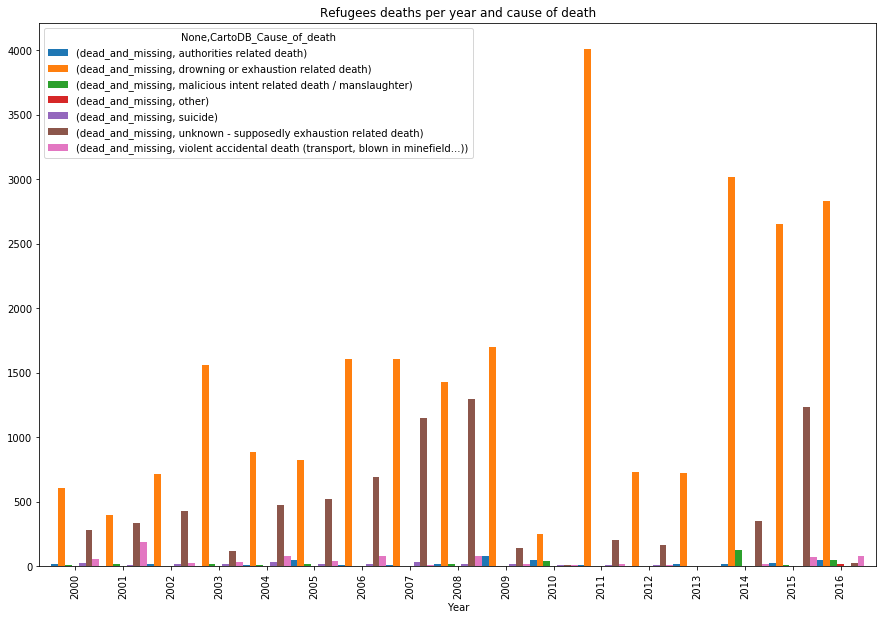

In [32]:
# grouped bar chart showing cause of death (CartoDB) by year
refugees_deaths.groupby(['Year', 'CartoDB_Cause_of_death']).sum()[['dead_and_missing']].unstack('CartoDB_Cause_of_death').plot.bar(width=1)
plt.title('Refugees deaths per year and cause of death')

# plt.savefig('bar_ref_death_per_year_and_cause.png')

In [33]:
# group all data by CartoDB_Cause_of_death
cause_of_death = refugees_deaths.groupby(['CartoDB_Cause_of_death', 'cause_of_death']).sum()[['dead_and_missing']]
cause_of_death.head(50)

dead_and_missing
CartoDB_Cause_of_death                        cause_of_death                                             
authorities related death                     asphyxiated                                               3
                                              drowned                                                   1
                                              fall                                                      1
                                              hit by a car                                              1
                                              illness                                                   1
                                              police violence                                         100
                                              shot                                                     28
                                              shot by border police                                    10
                                              shot by the police                                      256
drowning or exhaustion related death          asphyxiated                                             536
                                              died from dehydration                                   373
                                              died in childbirth                                        3
                                              died of a shock                                           2
                                              died of kidney failure                                    2
                                              died of suddent infant death                              2
                                              drowned                                               22693
                                              drowned or thirst                                        21
                                              exhaustion                                              183
                                              exhaustion or thirst                                     46
                                              frozen                                                   45
                                              heart failure                                            16
                                              heat exhaustion                                          10
                                              hypothermia                                             239
                                              hypothermia and dehydration                              26
                                              illness                                                   4
                                              lack of medical care                                     68
                                              starved                                                1235
                                              starved or died from dehydration                         11
                                              suffocated or drowned                                    45
malicious intent related death / manslaughter burned or asphyxiated due to arson attack                14
                                              died after a fight                                        6
                                              died because of dangerous undeclared work                 1
                                              died presumably  from ill treatments                     13
                                              executed                                                 20
                                              killed                                                   41
                                              lack of medical care                                      1
                                              murdered       

In [34]:
# substract violent accidental death (transport, blown in minefield...) only
violent_accidental_death = refugees_deaths[refugees_deaths['CartoDB_Cause_of_death'] == 'violent accidental death (transport, blown in minefield...)']
violent_accidental_death.head()

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
17,hit by a truck,"violent accidental death (transport, blown in ...",2016-05-28T00:00:00Z,2016,1.0,0.0,1,a 25-year old Afghan man was run over by a tru...,Calais,NaN,http://www.nordlittoral.fr/faits-divers/calais...
18,hit by a car,"violent accidental death (transport, blown in ...",2016-05-25T00:00:00Z,2016,1.0,0.0,1,an Eritrean woman was killed in Libya. Her dau...,Libya,NaN,http://www.cbc.ca/news/world/migrant-drownings...
20,drowned,"violent accidental death (transport, blown in ...",2016-05-26T00:00:00Z,2016,4.0,0.0,4,"the Libyan coast guard has recovered 4 bodies,...",off the coast of Libya,Central Mediterranean route,http://news.nationalpost.com/news/world/bodies...
28,bombed,"violent accidental death (transport, blown in ...",2016-05-09T00:00:00Z,2016,4.0,0.0,4,4 children died in a Kilis orphanage due to bo...,Kilis,NaN,http://www.thedailybeast.com/articles/2016/05/...
29,hit by a car,"violent accidental death (transport, blown in ...",2016-05-09T00:00:00Z,2016,1.0,0.0,1,a 24-year old man from Pakistan was hit by a c...,Calais,NaN,http://www.nordlittoral.fr/faits-divers/un-ref...


Text(0.5, 1.0, 'Violent accidental deaths of refugees - subcategories')

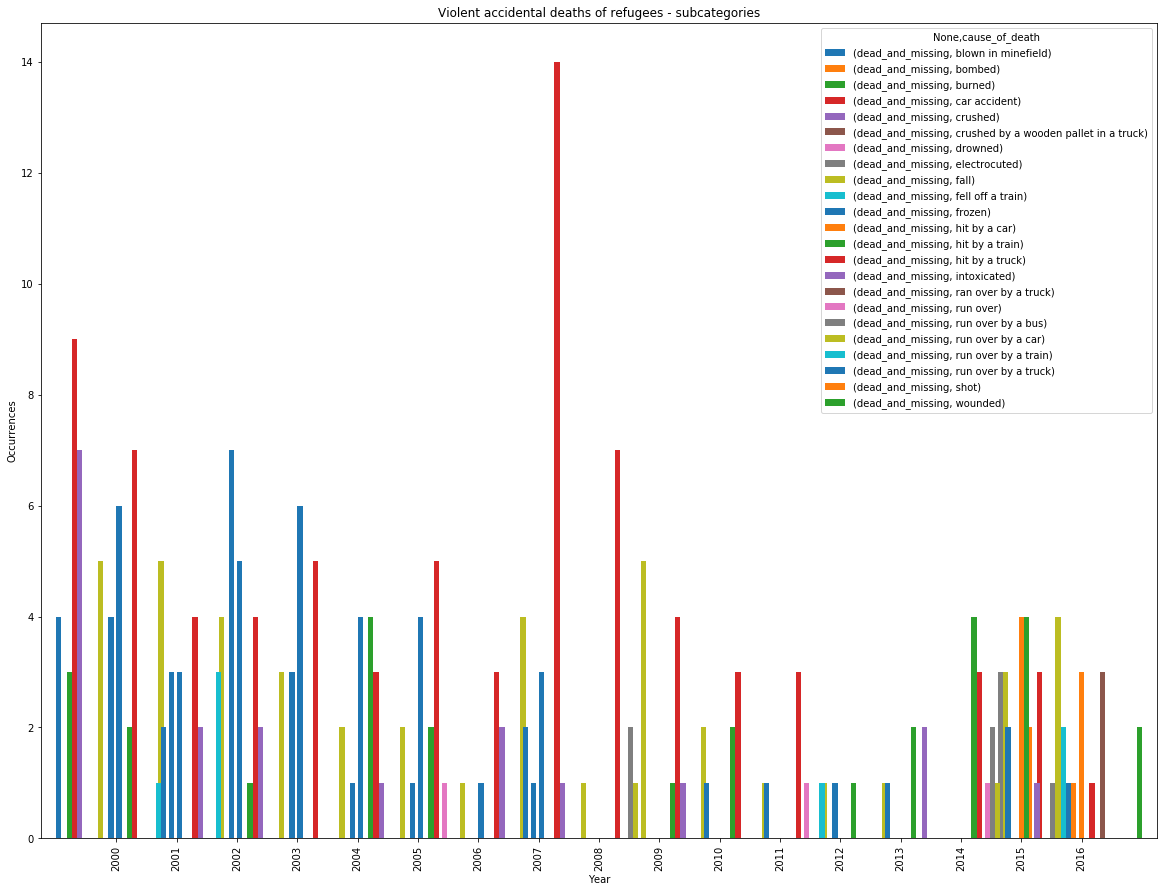

In [35]:
# grouped bar chart for violent accidental deaths
plt.rcParams['figure.figsize'] = [20,15]
violent_accidental_death.groupby(['Year', 'cause_of_death']).count()[['dead_and_missing']].unstack('cause_of_death').plot.bar(width=2)

plt.ylabel('Occurrences')
plt.title('Violent accidental deaths of refugees - subcategories')
# plt.savefig('grouped_bar_violent_accidental_death.png')

In [36]:
len(violent_accidental_death['cause_of_death'])

272

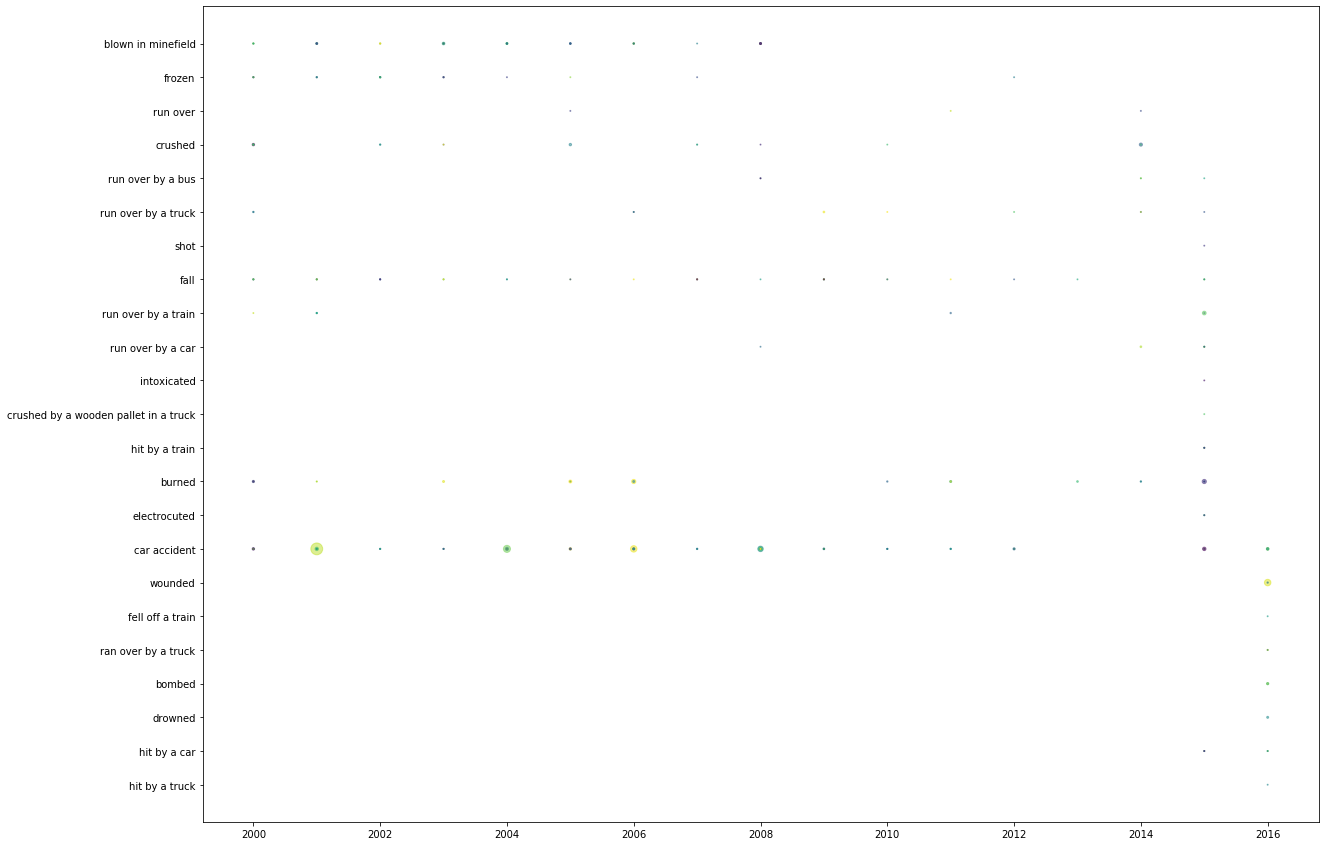

In [37]:
# scatter plot showing all refugees who died or went missing by year, 
# y axis represents the cause of death (with general cause violent accidental death)
colors = np.random.rand(len(violent_accidental_death['cause_of_death']))
plt.scatter( violent_accidental_death['Year'], violent_accidental_death['cause_of_death'],
            s=violent_accidental_death['dead_and_missing'],
            c=colors, alpha=0.5 )

In [38]:
refugees_deaths.head()

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
0,shot by the police,authorities related death,2016-06-20T00:00:00Z,2016,8.0,0.0,8,8 Syrian refugees wre shot by the Turkush bord...,near Jisr al-Shugour,NaN,http://edition.cnn.com/2016/06/20/middleeast/s...
1,drowned,drowning or exhaustion related death,2016-06-16T00:00:00Z,2016,1.0,0.0,1,"a body of a man, about 50, was found on a beac...",Lemos Vouliagmeni,Eastern Mediterranean route,http://www.hcg.gr/node/12832
2,drowned,drowning or exhaustion related death,2016-06-12T00:00:00Z,2016,1.0,0.0,1,a body of a man awas recovered in along with 1...,between Italy and Libya,Central Mediterranean route,http://www.dpa-international.com/news/internat...
3,stabbed,malicious intent related death / manslaughter,2016-06-02T00:00:00Z,2016,2.0,0.0,2,"2 men, a Turkish national and a suspected smug...",near Subotica,Western Balkan route,http://www.telegraph.co.uk/news/2016/06/13/hun...
4,unknown,unknown - supposedly exhaustion related death,2016-06-07T00:00:00Z,2016,0.0,1.0,1,a man was reported as missing off the coast of...,near Cadiz,Western Mediterranean route,NaN


In [39]:
# move 'unknown' cause in a separate dataset, drop them from refugees_deaths dataset
refugees_deaths_unknown = refugees_deaths[refugees_deaths['CartoDB_Cause_of_death'] == 'unknown - supposedly exhaustion related death']
refugees_deaths_unknown.head()

,cause_of_death,CartoDB_Cause_of_death,date,Year,dead,missing,dead_and_missing,description,location,route (Frontex),source_url
4,unknown,unknown - supposedly exhaustion related death,2016-06-07T00:00:00Z,2016,0.0,1.0,1,a man was reported as missing off the coast of...,near Cadiz,Western Mediterranean route,NaN
12,unknown,unknown - supposedly exhaustion related death,2016-05-29T00:00:00Z,2016,1.0,0.0,1,a decayed body of a 68-year old man was found...,Perveza,Eastern Mediterranean route,http://www.hcg.gr/node/12607
13,unknown,unknown - supposedly exhaustion related death,2016-05-30T00:00:00Z,2016,1.0,0.0,1,a body of a man was found in a boat with 123 r...,28 nautical miles North-west of Tripoli,Central Mediterranean route,http://www.irishexaminer.com/ireland/migrants-...
26,unknown,unknown - supposedly exhaustion related death,2016-05-16T00:00:00Z,2016,2.0,0.0,2,"2 young men were found dead in the Nile Delta,...","Kafr-el-Scheikh governorate, sea shore",NaN,http://english.ahram.org.eg/NewsContent/1/64/2...
32,unknown,unknown - supposedly exhaustion related death,2016-04-30T00:00:00Z,2016,1.0,0.0,1,"a body of a woman, badly decayed, was found on...",Samos,Eastern Mediterranean route,http://www.hcg.gr/node/12503


In [40]:
# remove 'unknown' cause from refugees_deaths dataset
refugees_deaths = refugees_deaths[refugees_deaths.CartoDB_Cause_of_death != 'unknown - supposedly exhaustion related death']
refugees_deaths.CartoDB_Cause_of_death.value_counts()

drowning or exhaustion related death                           1679
violent accidental death (transport, blown in minefield...)     272
suicide                                                         230
authorities related death                                       139
malicious intent related death / manslaughter                    93
other                                                            20
Name: CartoDB_Cause_of_death, dtype: int64

In [41]:
# get clean dataset with the columns needed for visualizations
clean_refugees_deaths = refugees_deaths.loc[:, ['cause_of_death', 'CartoDB_Cause_of_death', 
                                                'Year', 'dead_and_missing', 'description']]
clean_refugees_deaths.head()

,cause_of_death,CartoDB_Cause_of_death,Year,dead_and_missing,description
0,shot by the police,authorities related death,2016,8,8 Syrian refugees wre shot by the Turkush bord...
1,drowned,drowning or exhaustion related death,2016,1,"a body of a man, about 50, was found on a beac..."
2,drowned,drowning or exhaustion related death,2016,1,a body of a man awas recovered in along with 1...
3,stabbed,malicious intent related death / manslaughter,2016,2,"2 men, a Turkish national and a suspected smug..."
5,exposure,other,2016,1,a body of man was found dead in the slowaway ...


In [42]:
# get clean dataset with the columns needed for visualizations
clean_refugees_deaths.columns = ['cause_of_death', 'carto_db_cause_of_death', 'year', 'dead_and_missing', 
                                 'description']

clean_refugees_deaths.head()

,cause_of_death,carto_db_cause_of_death,year,dead_and_missing,description
0,shot by the police,authorities related death,2016,8,8 Syrian refugees wre shot by the Turkush bord...
1,drowned,drowning or exhaustion related death,2016,1,"a body of a man, about 50, was found on a beac..."
2,drowned,drowning or exhaustion related death,2016,1,a body of a man awas recovered in along with 1...
3,stabbed,malicious intent related death / manslaughter,2016,2,"2 men, a Turkish national and a suspected smug..."
5,exposure,other,2016,1,a body of man was found dead in the slowaway ...


In [43]:
# remove unknown cause of death from the dataframe
clean_refugees_deaths_no_unknown = clean_refugees_deaths[clean_refugees_deaths.cause_of_death != 'unknown']
clean_refugees_deaths_no_unknown.cause_of_death.value_counts()

drowned                                      1270
asphyxiated                                   105
shot by the police                            102
suicide - hanged                               94
starved                                        92
car accident                                   77
lack of medical care                           67
suicide - other                                63
hypothermia                                    53
frozen                                         47
murdered                                       42
fall                                           41
blown in minefield                             36
police violence                                27
suicide - put on fire                          23
burned                                         22
died from dehydration                          19
shot                                           18
crushed                                        18
heart failure                                  16


In [44]:
# remove drowned from the clean_refugees_deaths_no_unknown dataset
no_unknown_and_drowned = clean_refugees_deaths_no_unknown[clean_refugees_deaths_no_unknown.cause_of_death != 'drowned']
# no_unknown_and_drowned.cause_of_death.value_counts()
test_list = list(no_unknown_and_drowned.cause_of_death.unique())
test_list.sort()
print(test_list)

['asphyxiated', 'attacked by animals', 'bled to death due to barbed wire', 'blown in minefield', 'bombed', 'burned', 'burned or asphyxiated due to arson attack', 'burns or suffocation', 'car accident', 'crushed', 'crushed by a wooden pallet in a truck', 'died after a fight', 'died because of dangerous undeclared work', 'died from dehydration', 'died in a sewer', 'died in childbirth', 'died of a shock', 'died of kidney failure', 'died of suddent infant death', 'died presumably  from ill treatments', 'disappeared', 'drowned or thirst', 'electrocuted', 'executed', 'exhaustion', 'exhaustion or thirst', 'exposure', 'fall', 'fell off a train', 'frozen', 'heart failure', 'heat exhaustion', 'hit by a car', 'hit by a train', 'hit by a truck', 'hypothermia', 'hypothermia and dehydration', 'illness', 'intoxicated', 'killed', 'killed by bomb', 'lack of medical care', 'murdered', 'natural causes', 'police violence', 'ran over by a truck', 'run over', 'run over by a bus', 'run over by a car', 'run o

In [45]:
no_unknown_and_drowned.head()

,cause_of_death,carto_db_cause_of_death,year,dead_and_missing,description
0,shot by the police,authorities related death,2016,8,8 Syrian refugees wre shot by the Turkush bord...
3,stabbed,malicious intent related death / manslaughter,2016,2,"2 men, a Turkish national and a suspected smug..."
5,exposure,other,2016,1,a body of man was found dead in the slowaway ...
6,died in a sewer,other,2016,1,a young man frrom Sub-Saharan Africa died afte...
10,murdered,malicious intent related death / manslaughter,2016,1,"a 16-year old girl, Afghan asylum seeker, was ..."


In [46]:
# no_unknown_and_drowned

no_unknown_and_drowned.loc[no_unknown_and_drowned['carto_db_cause_of_death'] == 'malicious intent related death / manslaughter']['cause_of_death'].unique().tolist()

['stabbed',
 'murdered',
 'killed',
 'tortured',
 'shot',
 'lack of medical care',
 'died presumably  from ill treatments',
 'burned or asphyxiated due to arson attack',
 'executed',
 'died because of dangerous undeclared work',
 'wrong medical treatment, overdose',
 'died after a fight']

In [47]:
# conver the dataframe to json
some_json_data = no_unknown_and_drowned.to_dict(orient='records')
print(some_json_data)

[{'cause_of_death': 'shot by the police', 'carto_db_cause_of_death': 'authorities related death', 'year': 2016, 'dead_and_missing': 8, 'description': '8 Syrian refugees wre shot by the Turkush border police'}, {'cause_of_death': 'stabbed', 'carto_db_cause_of_death': 'malicious intent related death / manslaughter', 'year': 2016, 'dead_and_missing': 2, 'description': '2 men, a Turkish national and a suspected smuggler were found stabbed to death in the woods near Subotica'}, {'cause_of_death': 'exposure', 'carto_db_cause_of_death': 'other', 'year': 2016, 'dead_and_missing': 1, 'description': 'a body of  man was found dead in the slowaway of an airplane that landed in Brussel airport'}, {'cause_of_death': 'died in a sewer', 'carto_db_cause_of_death': 'other', 'year': 2016, 'dead_and_missing': 1, 'description': 'a young man frrom Sub-Saharan Africa died after trying to get into Melilla through a sewer'}, {'cause_of_death': 'murdered', 'carto_db_cause_of_death': 'malicious intent related de

In [49]:
import re

s_formatted = {'name': 'Refugee Deaths', 'children': [], 'level': 1}
s_cause_of_death = []
s_breakdown = []

# create 6 different lists with the unique cause of death within each category

causes = {}






for d in some_json_data:
#     d['name'] = d['carto_db_cause_of_death']
    if d['carto_db_cause_of_death'] not in s_cause_of_death:
        s_cause_of_death.append(d['carto_db_cause_of_death'])
        
        s_formatted['children'].append({'name': d['carto_db_cause_of_death'], 'level': 2, 'children': []})

        

# find unqiue cause within category
for cause in s_cause_of_death:
    causes[cause] = no_unknown_and_drowned.loc[no_unknown_and_drowned['carto_db_cause_of_death'] == cause]['cause_of_death'].unique().tolist()



# print(s_formatted['children'])


for death_cause in s_formatted['children']:
    for cause in causes[death_cause['name']]:
        death_cause['children'].append({'name': cause, 'level': 3, 'size': 0})

for d in some_json_data:
    for death_cause in s_formatted['children']:
        if  d['carto_db_cause_of_death'] == death_cause['name']:

            for unique_death in death_cause['children']:
                if unique_death['name'] == d['cause_of_death']:
                    unique_death['size'] += int(d['dead_and_missing'])



     
                
print(s_formatted['children'][2]['children'])
print(len(s_formatted['children'][2]['children']))

[{'name': 'exposure', 'level': 3, 'size': 5}, {'name': 'died in a sewer', 'level': 3, 'size': 1}, {'name': 'burns or suffocation', 'level': 3, 'size': 4}, {'name': 'illness', 'level': 3, 'size': 1}, {'name': 'disappeared', 'level': 3, 'size': 1}, {'name': 'starved', 'level': 3, 'size': 1}, {'name': 'suffocation', 'level': 3, 'size': 1}, {'name': 'natural causes', 'level': 3, 'size': 1}, {'name': 'killed by bomb', 'level': 3, 'size': 1}, {'name': 'bled to death due to barbed wire', 'level': 3, 'size': 2}, {'name': 'attacked by animals', 'level': 3, 'size': 1}, {'name': 'electrocuted', 'level': 3, 'size': 4}]
12


In [ ]:
# export the nested json
# with open (r'clean_data/refugees_deaths_2.json', 'w') as json_file:
#     json.dump(s_formatted, json_file)

In [ ]:
# export to csv
# no_unknown_and_drowned.to_csv(r'clean_data/refugees_deaths_2.csv', index=False)